## Machine Learnining: Lab and HW 10
### Homework Tasks:
* Plot the error
* Model XOR with the help of sigmoid, linear
* Add moments rule to learning equation


In [3]:
import numpy as np

n = 1
def sigmoid(m):
    return 1.0/(1.0 + np.exp(-n*m))

def sigmoid_prime(m):
    return (m)*(1-(m))

def tanh(m):
    return np.tanh(m)

def tanh_prime(m):
    return 1.0 - m**2

def linear(m):
    return m 

def linear_prime(m):
    return 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt 

class NN:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
        self.weights = []
        self.error_list = []
        self.epoch_list = []
        
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)              
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            self.error_list.append(np.average(np.abs(error)))
            self.epoch_list.append(k)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            if k % 10000 == 0: 
                print('epochs:', k)
            
            
    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NN([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn.predict(e))
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))
    

[[-0.81593017  0.12974806 -0.53960168]
 [-0.95758604  0.97486422 -0.95781634]
 [-0.01138423 -0.68364258  0.71442552]]
[[ 0.01831123]
 [-0.46330058]
 [-0.27178518]]
[0 0] [0.06172831]
[0 1] [0.17204257]
[1 0] [-0.1420756]
[1 1] [-0.0237182]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.02091868]
[0 1] [0.99384452]
[1 0] [0.99214408]
[1 1] [8.73693894e-05]


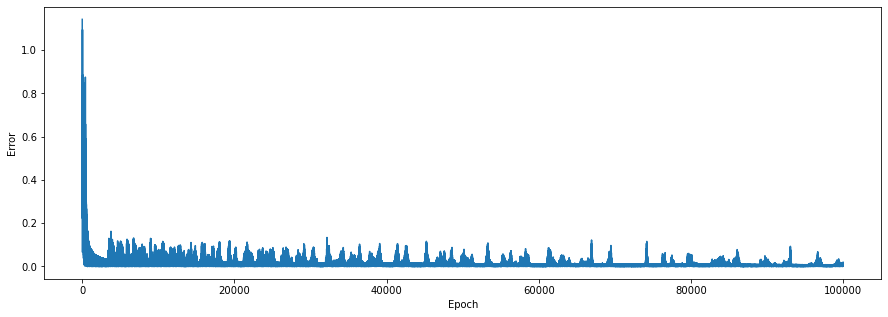

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(nn.epoch_list, nn.error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()



In [69]:
import numpy as np
import matplotlib.pyplot as plt 

class NeuralNetwork_Sigmoid:

    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
#        elif activation == 'linear':
#            self.activation = linear
#            self.activation_prime = linear_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        self.error_list = []
        self.epoch_list = []
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000, momentum = 2):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)              
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            self.error_list.append(np.average(np.abs(error)))
            self.epoch_list.append(k)
            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
                self.weights[i] += momentum*learning_rate*layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)
            
            
    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

In [78]:
if __name__ == '__main__':

    nn = NeuralNetwork_Sigmoid([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn.predict(e))
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))
    

[[ 0.0107604   0.83066003  0.81612288]
 [-0.87029275  0.60798553 -0.5656316 ]
 [-0.66269918 -0.92514847 -0.88329684]]
[[ 0.57661471]
 [-0.99721965]
 [-0.12901683]]
[0 0] [0.37891374]
[0 1] [0.41583558]
[1 0] [0.33025392]
[1 1] [0.36231087]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.00862952]
[0 1] [0.98961487]
[1 0] [0.99122977]
[1 1] [0.0088586]


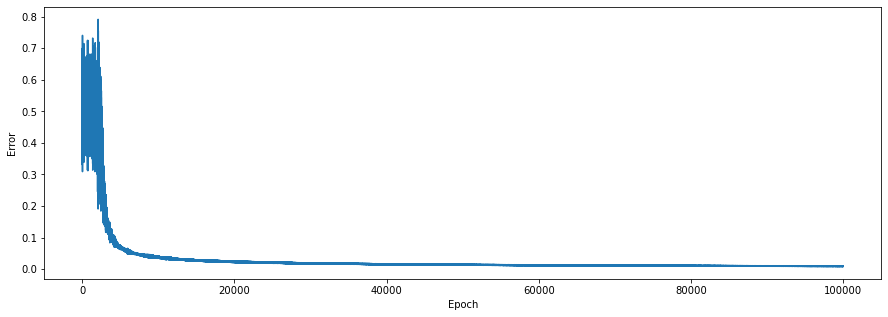

In [79]:
plt.figure(figsize=(15,5))
plt.plot(nn.epoch_list, nn.error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [98]:
class NeuralNetwork_Linear:

    def __init__(self, layers):
        
#         self.activation = tanh
#         self.activation_prime = tanh_prime
#         self.activation = sigmoid
#         self.activation_prime = sigmoid_prime
        self.activation = linear
        self.activation_prime = linear_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        self.error_list = []
        self.epoch_list = []
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000, momentum = 2):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            self.error_list.append(np.average(np.abs(error)))
            self.epoch_list.append(k)
            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
                #self.weights[i] += momentum*learning_rate*layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a


In [99]:
if __name__ == '__main__':

    nn = NeuralNetwork_Linear([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn.predict(e))
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

[[-0.42374525 -0.79290752 -0.5877237 ]
 [-0.97571374 -0.16731694  0.34846062]
 [-0.54092746  0.63390329  0.50691367]]
[[-0.59154103]
 [ 0.9634142 ]
 [ 0.08117365]]
[0 0] [-0.56094334]
[0 1] [0.41089691]
[1 0] [-0.11667833]
[1 1] [0.85516192]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.6732319]
[0 1] [0.60652587]
[1 0] [0.58162384]
[1 1] [0.51491781]


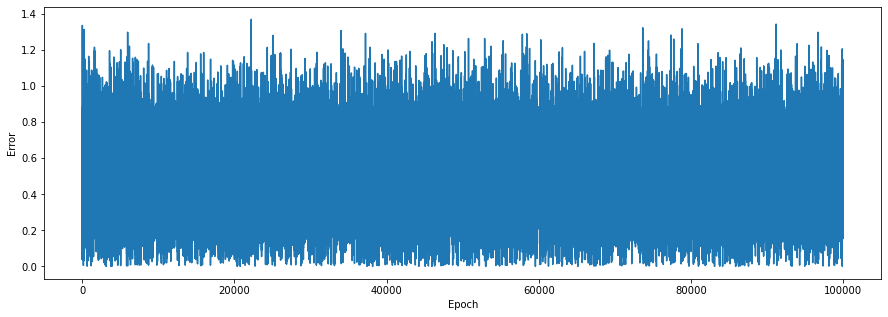

In [97]:
plt.figure(figsize=(15,5))
plt.plot(nn.epoch_list, nn.error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()